In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cmpMap
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import r2_score

**Load the data using pandas' read_csv function**

In [2]:
odData = pd.read_csv("offdesign.txt", delimiter='\s+')
odDataNoRC = pd.read_csv("offdesignNoRC.txt", delimiter='\s+')
odDataNoRCzeroMach = pd.read_csv("offdesignNoRCzeroMach.txt", delimiter='\s+')

**Display couple of data points to check if data is loaded correctly**

In [3]:
pd.options.display.max_columns = 1000
odData.head(3)

,alt,humid,XM,P2q1,FHV,ZWBLq2,PWX,ZXN_HPC,d_A8,d_P4q3,ZWBLD,dtamb,W_reciq2,d_W_HPC,d_e_HPC,d_eHPTqN,d_W41R,d_e_HPT,d_P6q5,FN,FG,SFC,FNqW2,WBHDq2,WBLDq2,A8,CD8,ang8,XM8,far8,P8qamb,Omega,e34,sNOx,P3d4q3,eta_prop,eta_core,PWis,EAS,rho0,P2qP1,V0,Humidity,XN_HP_A,XN_HPC,WFqP3,act_lim,EPR,V8,WBLD,WF,WFRH,WF_total,W2,W3,W3Rstd,W4,W41,W41Rstd,W5,W5Rstd,W8,W8Rstd,W2Rstd,XNRWRHPT,Pamb,P2,Ps2,P3,Ps3,P4,P5,P8,PBld,P2_clean,P2_dist,Ps8,T2,T3,T4,T40,T41,T5,T7,T8,TBld,d_T2,P3q2,dh23,XNRSTD,SM_HPC,SM_N_HPC,f_e_HPC,f_w_HPC,VGV,P3q2_cl,P3q2_ds,P3q2surg,e23is,e23pol,P4q5,dh415,PW_T,WClNq2,WClq2,P5d6q5,XNRHPT,f_e_HPT,f_w_HPT,e45is,e45pol,e45th
0,6517.9,0,0.660160,0.99,43.124,0.01,0,0.73596,0,0,0,13.889,0,0,0,0,0,0,0,3.0599,5.2343,33.418,300.17,0,0.01,0.077254,0.96,20.000,1.0,0.010132,2.0593,582.45,0.99832,0.083046,3.6943,0.58699,0.25850,1371.8,289.360,0.58930,0.99,213.290,0,9198.4,0.73596,60.105,-1,1.5848,480.91,0.10194,0.10226,0,0.10226,10.194,10.194,4.3771,9.175,9.6847,5.8490,10.194,17.376,10.194,17.739,17.548,5.3640,43.925,58.267,56.795,309.39,293.30,297.96,92.344,90.457,309.39,58.267,58.267,48.218,282.35,495.28,930.30,930.30,908.83,695.32,695.32,695.32,495.28,0,5.3098,215.84,0.74349,46.439,30.110,0.98851,0.99425,0,5.3098,5.3098,5.4955,0.80288,0.84230,3.2266,227.22,2200.5,0.05,0.05,2.0436,0.91708,0.99402,0.99701,0.86057,0.84100,0.83657
1,8926.7,0,0.072632,0.99,43.124,0.01,0,0.86348,0,0,0,-16.489,0,0,0,0,0,0,0,7.8553,8.0948,21.864,698.39,0,0.01,0.077254,0.96,20.000,1.0,0.015424,3.5468,482.00,0.99876,0.082366,2.9731,0.05776,0.39849,2954.0,26.785,0.50679,0.99,21.290,0,10792.0,0.86348,83.470,-1,3.6432,524.63,0.11248,0.17175,0,0.17175,11.248,11.248,3.9266,10.182,10.7450,5.8321,11.307,17.297,11.307,17.654,31.793,5.7302,31.079,30.882,28.128,374.18,358.71,363.05,112.510,110.230,374.18,30.882,30.882,59.074,213.86,478.90,1120.80,1120.80,1089.90,831.40,831.40,831.40,478.90,0,12.1160,267.82,1.00230,23.512,19.865,0.98180,0.99090,0,12.1160,12.1160,14.3440,0.83406,0.88039,3.2268,280.39,3012.7,0.05,0.05,2.0249,0.98253,0.99380,0.99690,0.88035,0.86371,0.86182
2,4502.2,0,0.165100,0.99,43.124,0.01,0,0.74873,0,0,0,-28.630,0,0,0,0,0,0,0,7.3848,8.1327,22.494,496.03,0,0.01,0.077254,0.96,19.999,1.0,0.011270,2.2875,505.44,0.99866,0.075962,3.3702,0.16862,0.31145,2249.9,82.960,0.87316,0.99,50.238,0,9358.1,0.74873,67.084,-1,2.3143,479.96,0.14888,0.16612,0,0.16612,14.888,14.888,4.1806,13.416,14.1610,5.8631,14.905,17.375,14.905,17.737,23.220,5.4638,57.712,58.234,55.600,450.31,429.06,435.13,134.770,132.010,450.31,58.234,58.234,70.381,231.51,448.76,934.77,934.77,910.97,692.65,692.65,692.65,448.76,0,7.7328,219.34,0.83531,39.405,27.439,0.99357,0.99678,0,7.7328,7.7328,8.1816,0.84203,0.87972,3.2287,230.63,3265.9,0.05,0.05,2.0432,0.93189,1.00000,1.00000,0.87073,0.85235,0.84917


**A nice pandas function to display some properties of the data***

In [4]:
odData.describe()

,alt,humid,XM,P2q1,FHV,ZWBLq2,PWX,ZXN_HPC,d_A8,d_P4q3,ZWBLD,dtamb,W_reciq2,d_W_HPC,d_e_HPC,d_eHPTqN,d_W41R,d_e_HPT,d_P6q5,FN,FG,SFC,FNqW2,WBHDq2,WBLDq2,A8,CD8,ang8,XM8,far8,P8qamb,Omega,e34,sNOx,P3d4q3,eta_prop,eta_core,PWis,EAS,rho0,P2qP1,V0,Humidity,XN_HP_A,XN_HPC,WFqP3,act_lim,EPR,V8,WBLD,WF,WFRH,WF_total,W2,W3,W3Rstd,W4,W41,W41Rstd,W5,W5Rstd,W8,W8Rstd,W2Rstd,XNRWRHPT,Pamb,P2,Ps2,P3,Ps3,P4,P5,P8,PBld,P2_clean,P2_dist,Ps8,T2,T3,T4,T40,T41,T5,T7,T8,TBld,d_T2,P3q2,dh23,XNRSTD,SM_HPC,SM_N_HPC,f_e_HPC,f_w_HPC,VGV,P3q2_cl,P3q2_ds,P3q2surg,e23is,e23pol,P4q5,dh415,PW_T,WClNq2,WClq2,P5d6q5,XNRHPT,f_e_HPT,f_w_HPT,e45is,e45pol,e45th
count,6000.000000,6000.0,6000.000000,6.000000e+03,6.000000e+03,6.000000e+03,6000.0,6000.000000,6000.0,6000.0,6000.0,6000.000000,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.0,6000.000000,6000.000000,6000.000000,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,5009.320776,0.0,0.404493,9.900000e-01,4.312400e+01,1.000000e-02,0.0,0.798967,0.0,0.0,0.0,-0.595221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.734652,9.769206,30.957400,472.407945,0.0,1.000000e-02,7.725400e-02,0.952349,20.000006,0.938043,0.013467,2.716432,497.648643,0.998407,0.117575,3.379943,0.357112,0.302529,3462.461887,198.748369,0.770145,9.900000e-01,129.350694,0.0,9985.953650,0.798967,73.403341,-1.0,2.415750,486.860250,0.150385,0.216561,0.0,0.216561,15.038465,15.038465,4.181077,13.600798,14.352718,5.850281,15.104639,16.933684,15.104639,17.270948,22.938893,5.451007,57.180446,66.075966,63.007024,498.953502,475.963688,482.523132,152.871193,149.856950,498.952787,66.075966,66.075966,84.024791,266.070997,509.657298,1066.802625,1066.802563,1039.714013,801.099625,801.099625,801.099625,509.657298,0.0,7.904507,247.526278,0.836423,37.033191,25.437640,0.990936,0.995468,0.0,7.904507,7.904507,8.960466,0.816834,0.857593,3.134056,259.401023,3969.722433,5.000000e-02,5.000000e-02,1.944892,0.931769,0.996194,0.998097,0.868789,0.851194,0.847266
std,2867.767733,0.0,0.230412,1.400108e-13,4.732609e-12,5.620972e-16,0.0,0.115595,0.0,0.0,0.0,23.094549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.362009,6.286652,10.649196,191.113009,0.0,5.620972e-16,5.329515e-15,0.014229,0.005621,0.111544,0.004308,1.078315,349.522563,0.001825,0.062228,0.352793,0.201986,0.103104,2895.842881,121.432099,0.242674,1.400108e-13,74.263819,0.0,1444.777843,0.115595,16.517998,0.0,0.940462,85.588133,0.065268,0.144363,0.0,0.144363,6.526765,6.526765,0.216591,5.942793,6.269115,0.013552,6.595442,0.775820,6.595442,0.817477,6.979185,0.287833,21.336706,26.441285,25.769847,251.836785,241.537847,244.424721,75.390533,73.832331,251.836338,26.441285,26.441285,38.110626,32.856213,67.452621,215.081038,215.081306,208.093812,160.512812,160.512812,160.512812,67.452621,0.0,3.196304,59.337202,0.132728,9.290400,4.086308,0.006654,0.003327,0.0,3.196304,3.196304,4.243725,0.034276,0.034155,0.159632,61.085020,2411.359744,5.655670e-15,5.655670e-15,0.168052,0.049418,0.005124,0.002562,0.014901,0.016487,0.016859
min,3.004800,0.0,0.000144,9.900000e-01,4.312400e+01,1

**Checking the dependency of corrected variables to ambient conditions and Mach number** \
It seems that due to Reynolds correction and Mach number, we can not omit the effect of these parameters on corrected variables. \
Still these 3 parameters (ambient pressure, ambient temperature and Mach) can be reduced to 2. \
Need to work on how it can be done properly.

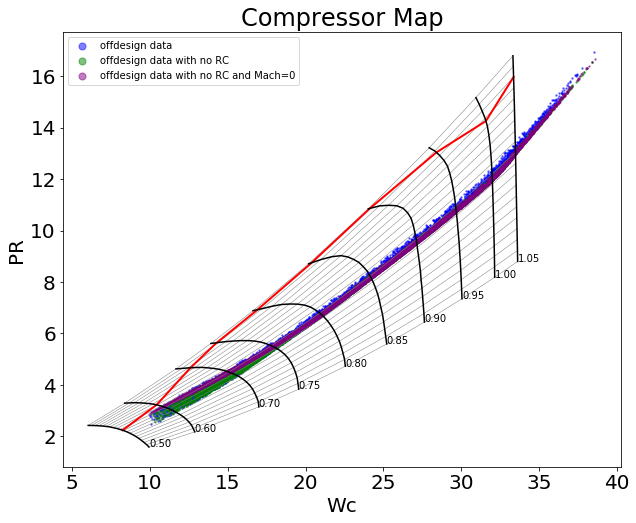

In [5]:
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(cmpMap.CmpMap["Wc"], cmpMap.CmpMap["PR"], c="gray", linewidth=0.5)
ax.plot(cmpMap.CmpMap["surgeWc"], cmpMap.CmpMap["surgePR"], c="red", linewidth=2.0)
for ispeed, speed in enumerate(cmpMap.CmpMap["Nc"]):
    ax.plot(cmpMap.CmpMap["Wc"][ispeed], cmpMap.CmpMap["PR"][ispeed], c="black")
    ax.annotate(str('{:>1.2f}'.format(speed)), (cmpMap.CmpMap["Wc"][ispeed][0], 
                cmpMap.CmpMap["PR"][ispeed][0]), fontsize=10)
ax.scatter(odData["W2Rstd"], odData["P3q2"], 
           c="blue", s=2, marker="o", alpha = 0.5, label="offdesign data")
ax.scatter(odDataNoRC["W2Rstd"], odDataNoRC["P3q2"], 
           c="green", s=2, marker="o", alpha = 0.5, label="offdesign data with no RC")
ax.scatter(odDataNoRCzeroMach["W2Rstd"], odDataNoRCzeroMach["P3q2"], 
           c="purple", s=2, marker="o", alpha = 0.5, label="offdesign data with no RC and Mach=0")
ax.set_title("Compressor Map")
ax.set_xlabel("Wc")
ax.set_ylabel("PR")
ax.legend(markerscale=5., prop={'size': 10})
handles, labels = ax.get_legend_handles_labels()
plt.show()

**Making data suitable to use with scikitlearn's GPR functions** \
First 3000 data will be used to train.

In [6]:
x_Pamb = np.atleast_2d(odData["Pamb"][:3000]).T
x_dtamb = np.atleast_2d(odData["dtamb"][:3000]).T
x_XM = np.atleast_2d(odData["XM"][:3000]).T
x_ZXN_HPC = np.atleast_2d(odData["ZXN_HPC"][:3000]).T
xGPR = np.concatenate((x_Pamb, x_dtamb, x_XM, x_ZXN_HPC),axis=1)
yGPR = np.array(odData["T4"][:3000])

print(xGPR)
print(yGPR)

[[ 4.3925e+01  1.3889e+01  6.6016e-01  7.3596e-01]
 [ 3.1079e+01 -1.6489e+01  7.2632e-02  8.6348e-01]
 [ 5.7712e+01 -2.8630e+01  1.6510e-01  7.4873e-01]
 ...
 [ 5.0400e+01  1.5258e+01  3.1938e-02  6.4014e-01]
 [ 4.5571e+01 -3.2499e+01  3.0972e-01  9.6327e-01]
 [ 4.2023e+01 -3.5392e+01  2.3118e-01  9.5160e-01]]
[ 930.3  1120.8   934.77 ...  862.44 1296.4  1262.5 ]


**GPR model definitions**

In [7]:
kernel = RBF([10, 10, 0.1, 0.1], (1e-3, 1e3))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, normalize_y=True, alpha=1e-3).fit(xGPR,yGPR)
print(gp.kernel_)

RBF(length_scale=[30.7, 31.8, 0.439, 0.0436])


**Checking the predictions** \
Last 3000 data will be used to test.

In [8]:
x_Pamb = np.atleast_2d(odData["Pamb"][3001:]).T
x_dtamb = np.atleast_2d(odData["dtamb"][3001:]).T
x_XM = np.atleast_2d(odData["XM"][3001:]).T
x_ZXN_HPC = np.atleast_2d(odData["ZXN_HPC"][3001:]).T
xTest = np.concatenate((x_Pamb, x_dtamb, x_XM, x_ZXN_HPC),axis=1)
yTest = np.array(odData["T4"][3001:])
yPred, MSE = gp.predict(xTest, return_std=True)
absPerErr = 100*abs(yTest-yPred)/abs(yTest)
print(r2_score(yTest, yPred))
print(absPerErr)
print(max(absPerErr))
print(np.mean(absPerErr))

0.999973043655934
[0.09523676 0.12025054 0.05930468 ... 0.01992851 0.12426114 0.03327698]
1.686758831631092
0.06607065785973826
